In [1]:
# -*- coding: utf-8 -*-
"""
@author: lrhao
@software: jupyter
@file: baseline.ipynb
@time: 2020-12-11
@description：
"""
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
submit = pd.read_csv('../data/submit.csv')
train.shape, test.shape, submit.shape

((40000, 21), (15000, 20), (15000, 2))

In [4]:
cate_2_cols = ['XINGBIE', 'ZHIWU', 'XUELI']
cate_cols = ['HYZK', 'ZHIYE', 'ZHICHEN', 'DWJJLX', 'DWSSHY', 'GRZHZT']
train[cate_cols].head()

,HYZK,ZHIYE,ZHICHEN,DWJJLX,DWSSHY,GRZHZT
0,90,90,999,150,12,1
1,90,90,999,110,0,1
2,90,90,999,150,9,1
3,90,90,999,150,7,1
4,90,90,999,900,14,1


In [5]:
num_cols = ['GRJCJS', 'GRZHYE', 'GRZHSNJZYE', 'GRZHDNGJYE', 'GRYJCE', 'DWYJCE','DKFFE', 'DKYE', 'DKLL']
train[num_cols].head()

,GRJCJS,GRZHYE,GRZHSNJZYE,GRZHDNGJYE,GRYJCE,DWYJCE,DKFFE,DKYE,DKLL
0,1737.0,3223.515,801.310,837.000,312.00,312.00,175237,154112.935,2.708
1,4894.0,18055.195,53213.220,1065.200,795.84,795.84,300237,298252.945,2.979
2,10297.0,27426.600,13963.140,7230.020,1444.20,1444.20,150237,147339.130,2.708
3,10071.5,111871.130,99701.265,2271.295,1417.14,1417.14,350237,300653.780,2.708
4,2007.0,237.000,11028.875,35.780,325.50,325.50,150237,145185.010,2.708


特征工程

In [6]:
df = pd.concat([train, test], axis = 0).reset_index(drop = True)

/Users/zhaoliang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
col_dict = {
    'id': '主键',
    'XINGBIE': '性别',
    'CSNY': '出生年月',
    'HYZK': '婚姻状况',
    'ZHIYE': '职业',
    'ZHICHEN': '职称',
    'ZHIWU': '职务',
    'XUELI': '学历',
    'DWJJLX': '单位经济类型',
    'DWSSHY': '单位所属行业',
    'GRJCJS': '个人缴存基数',
    'GRZHZT': '个人账户状态',
    'GRZHYE': '个人账户余额',
    'GRZHSNJZYE': '个人账户上年结转余额',
    'GRZHDNGJYE': '个人账户当年归集余额', 
    'GRYJCE': '个人月缴存额',
    'DWYJCE': '单位月缴存额',
    'DKFFE': '贷款发放额',
    'DKYE': '贷款余额',
    'DKLL': '贷款利率',
    'label': '是否逾期'
}

In [8]:
df['missing_rate'] = (df.shape[1] - df.count(axis = 1)) / df.shape[1]

df['DKFFE_DKYE'] = df['DKFFE'] + df['DKYE']
df['DKFFE_DKY_multi_DKLL'] = (df['DKFFE'] + df['DKYE']) * df['DKLL']
df['DKFFE_multi_DKLL'] = df['DKFFE'] * df['DKLL']
df['DKYE_multi_DKLL'] = df['DKYE'] * df['DKLL']
df['GRYJCE_DWYJCE'] = df['GRYJCE'] + df['DWYJCE']
df['GRZHDNGJYE_GRZHSNJZYE'] = df['GRZHDNGJYE'] + df['GRZHSNJZYE']

df['DKFFE_multi_DKLL_ratio'] = df['DKFFE'] * df['DKLL'] / df['DKFFE_DKY_multi_DKLL']
df['DKYE_multi_DKLL_ratio'] = df['DKYE'] * df['DKLL'] / df['DKFFE_DKY_multi_DKLL']
df['DKYE_DKFFE_ratio'] = df['DKYE'] / df['DKFFE_DKYE']
df['DKFFE_DKYE_ratio'] = df['DKFFE'] / df['DKFFE_DKYE']
df['GRZHYE_diff_GRZHDNGJYE'] = df['GRZHYE'] - df['GRZHDNGJYE']
df['GRZHYE_diff_GRZHSNJZYE'] = df['GRZHYE'] - df['GRZHSNJZYE']
df['GRYJCE_DWYJCE_ratio'] = df['GRYJCE'] / df['GRYJCE_DWYJCE']
df['DWYJCE_GRYJCE_ratio'] = df['DWYJCE'] / df['GRYJCE_DWYJCE']


gen_feats = ['DKFFE_DKYE', 'DKFFE_DKY_multi_DKLL', 'DKFFE_multi_DKLL', 'DKYE_multi_DKLL', 'GRYJCE_DWYJCE', 
             'GRZHDNGJYE_GRZHSNJZYE', 'DKFFE_multi_DKLL_ratio', 'DKYE_multi_DKLL_ratio', 'GRZHYE_diff_GRZHDNGJYE',
            'GRZHYE_diff_GRZHSNJZYE', 'GRYJCE_DWYJCE_ratio', 'DWYJCE_GRYJCE_ratio', 'DKYE_DKFFE_ratio', 'DKFFE_DKYE_ratio']

df.head()

,CSNY,DKFFE,DKLL,DKYE,DWJJLX,DWSSHY,DWYJCE,GRJCJS,GRYJCE,GRZHDNGJYE,GRZHSNJZYE,GRZHYE,GRZHZT,HYZK,XINGBIE,XUELI,ZHICHEN,ZHIWU,ZHIYE,id,label,missing_rate,DKFFE_DKYE,DKFFE_DKY_multi_DKLL,DKFFE_multi_DKLL,DKYE_multi_DKLL,GRYJCE_DWYJCE,GRZHDNGJYE_GRZHSNJZYE,DKFFE_multi_DKLL_ratio,DKYE_multi_DKLL_ratio,DKYE_DKFFE_ratio,DKFFE_DKYE_ratio,GRZHYE_diff_GRZHDNGJYE,GRZHYE_diff_GRZHSNJZYE,GRYJCE_DWYJCE_ratio,DWYJCE_GRYJCE_ratio
0,1038672000,175237,2.708,154112.935,150,12,312.00,1737.0,312.00,837.000,801.310,3223.515,1,90,1,99,999,0,90,train_0,0.0,0.0,329349.935,8.918796e+05,474541.796,417337.827980,624.00,1638.310,0.532069,0.467931,0.467931,0.532069,2386.515,2422.205,0.5,0.5
1,504892800,300237,2.979,298252.945,110,0,795.84,4894.0,795.84,1065.200,53213.220,18055.195,1,90,2,99,999,0,90,train_1,0.0,0.0,598489.945,1.782902e+06,894406.023,888495.523155,1591.68,54278.420,0.501658,0.498342,0.498342,0.501658,16989.995,-35158.025,0.5,0.5
2,736185600,150237,2.708,147339.130,150,9,1444.20,10297.0,1444.20,7230.020,13963.140,27426.600,1,90,1,99,999,0,90,train_2,0.0,0.0,297576.130,8.058362e+05,406841.796,398994.364040,2888.40,21193.160,0.504869,0.495131,0.495131,0.504869,20196.580,13463.460,0.5,0.5
3,428515200,350237,2.708,300653.780,150,7,1417.14,10071.5,1417.14,2271.295,99701.265,111871.130,1,90,1,99,999,0,90,train_3,0.0,0.0,650890.780,1.762612e+06,948441.796,814170.436240,2834.28,101972.560,0.538089,0.461911,0.461911,0.538089,109599.835,12169.865,0.5,0.5
4,544204800,150237,2.708,145185.010,900,14,325.50,2007.0,325.50,35.780,11028.875,237.000,1,90,2,99,999,0,90,train_4,0.0,0.0,295422.010,8.000028e+05,406841.796,393161.007080,651.00,11064.655,0.508550,0.491450,0.491450,0.508550,201.220,-10791.875,0.5,0.5


/Users/zhaoliang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans.


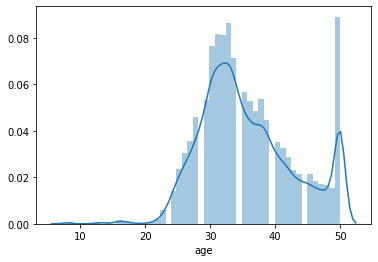

In [9]:
def get_age(df,col = 'age'):
    df[col+"_genFeat1"]=(df['age'] > 18).astype(int)
    df[col+"_genFeat2"]=(df['age'] > 25).astype(int)
    df[col+"_genFeat3"]=(df['age'] > 30).astype(int)
    df[col+"_genFeat4"]=(df['age'] > 35).astype(int)
    df[col+"_genFeat5"]=(df['age'] > 40).astype(int)
    df[col+"_genFeat6"]=(df['age'] > 45).astype(int)
    return df, [col + f'_genFeat{i}' for i in range(1, 7)]

df['age'] = ((1609430399 - df['CSNY']) / (365 * 24 * 3600)).astype(int)
df, genFeats1 = get_age(df, col = 'age')

sns.distplot(df['age'][df['age'] > 0])

/Users/zhaoliang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/Users/zhaoliang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


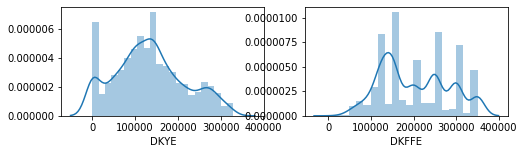

In [11]:
def get_daikuanYE(df,col):
    df[col + '_genFeat1'] = (df[col] > 100000).astype(int)
    df[col + '_genFeat2'] = (df[col] > 120000).astype(int)
    df[col + '_genFeat3'] = (df[col] > 140000).astype(int)
    df[col + '_genFeat4'] = (df[col] > 180000).astype(int)
    df[col + '_genFeat5'] = (df[col] > 220000).astype(int)
    df[col + '_genFeat6'] = (df[col] > 260000).astype(int)
    df[col + '_genFeat7'] = (df[col] > 300000).astype(int)
    return df, [col + f'_genFeat{i}' for i in range(1, 8)]

df, genFeats2 = get_daikuanYE(df, col = 'DKYE')
df, genFeats3 = get_daikuanYE(df, col = 'DKFFE')


plt.figure(figsize = (8, 2))
plt.subplot(1,2,1)
sns.distplot(df['DKYE'][df['label'] == 1])
plt.subplot(1,2,2)
sns.distplot(df['DKFFE'][df['label'] == 1])

In [16]:
for f in tqdm(cate_cols):
    df[f] = df[f].map(dict(zip(df[f].unique(), range(df[f].nunique()))))
    df[f + '_count'] = df[f].map(df[f].value_counts())
    df = pd.concat([df,pd.get_dummies(df[f],prefix=f"{f}")],axis=1)
    
    
cate_cols_combine = [[cate_cols[i], cate_cols[j]] for i in range(len(cate_cols)) \
                     for j in range(i + 1, len(cate_cols))]


for f1, f2 in tqdm(cate_cols_combine):
    df['{}_{}_count'.format(f1, f2)] = df.groupby([f1, f2])['id'].transform('count')
    df['{}_in_{}_prop'.format(f1, f2)] = df['{}_{}_count'.format(f1, f2)] / df[f2 + '_count']
    df['{}_in_{}_prop'.format(f2, f1)] = df['{}_{}_count'.format(f1, f2)] / df[f1 + '_count']

    
for f1 in tqdm(cate_cols):
    g = df.groupby(f1)
    for f2 in num_cols + gen_feats:
        for stat in ['sum', 'mean', 'std', 'max', 'min', 'std']:
            df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)
    for f3 in genFeats2 + genFeats3:
        for stat in ['sum', 'mean']:
            df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)

num_cols_gen_feats = num_cols + gen_feats
for f1 in tqdm(num_cols_gen_feats):
    g = df.groupby(f1)
    for f2 in num_cols_gen_feats:
        if f1 != f2:
            for stat in ['sum', 'mean', 'std', 'max', 'min', 'std']:
                df['{}_{}_{}'.format(f1, f2, stat)] = g[f2].transform(stat)

for i in tqdm(range(len(num_cols_gen_feats))):
    for j in range(i + 1, len(num_cols_gen_feats)):
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_add'] = df[num_cols_gen_feats[i]] + df[num_cols_gen_feats[j]]
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_diff'] = df[num_cols_gen_feats[i]] - df[num_cols_gen_feats[j]]
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_multi'] = df[num_cols_gen_feats[i]] * df[num_cols_gen_feats[j]]
        df[f'numsOf_{num_cols_gen_feats[i]}_{num_cols_gen_feats[j]}_div'] = df[num_cols_gen_feats[i]] / (df[num_cols_gen_feats[j]] + 0.0000000001)
    
            

100%|██████████| 15/15 [00:00<00:00, 24.02it/s]


训练集、测试集

In [12]:
train_df = df[df['label'].isna() == False].reset_index(drop=True)
test_df = df[df['label'].isna() == True].reset_index(drop=True)
display(train_df.shape, test_df.shape)


(40000, 4409)

(15000, 4409)

In [13]:
drop_feats = [f for f in train_df.columns if train_df[f].nunique() == 1 or train_df[f].nunique() == 0]
len(drop_feats), drop_feats

(460,
 ['missing_rate',
  'GRYJCE_DWYJCE_ratio',
  'DWYJCE_GRYJCE_ratio',
  'HYZK_GRYJCE_DWYJCE_ratio_mean',
  'HYZK_GRYJCE_DWYJCE_ratio_std',
  'HYZK_GRYJCE_DWYJCE_ratio_max',
  'HYZK_GRYJCE_DWYJCE_ratio_min',
  'HYZK_DWYJCE_GRYJCE_ratio_mean',
  'HYZK_DWYJCE_GRYJCE_ratio_std',
  'HYZK_DWYJCE_GRYJCE_ratio_max',
  'HYZK_DWYJCE_GRYJCE_ratio_min',
  'ZHIYE_GRYJCE_DWYJCE_ratio_mean',
  'ZHIYE_GRYJCE_DWYJCE_ratio_std',
  'ZHIYE_GRYJCE_DWYJCE_ratio_max',
  'ZHIYE_GRYJCE_DWYJCE_ratio_min',
  'ZHIYE_DWYJCE_GRYJCE_ratio_mean',
  'ZHIYE_DWYJCE_GRYJCE_ratio_std',
  'ZHIYE_DWYJCE_GRYJCE_ratio_max',
  'ZHIYE_DWYJCE_GRYJCE_ratio_min',
  'ZHICHEN_GRYJCE_DWYJCE_ratio_mean',
  'ZHICHEN_GRYJCE_DWYJCE_ratio_std',
  'ZHICHEN_GRYJCE_DWYJCE_ratio_max',
  'ZHICHEN_GRYJCE_DWYJCE_ratio_min',
  'ZHICHEN_DWYJCE_GRYJCE_ratio_mean',
  'ZHICHEN_DWYJCE_GRYJCE_ratio_std',
  'ZHICHEN_DWYJCE_GRYJCE_ratio_max',
  'ZHICHEN_DWYJCE_GRYJCE_ratio_min',
  'DWJJLX_GRYJCE_DWYJCE_ratio_mean',
  'DWJJLX_GRYJCE_DWYJCE_ratio_std',

In [14]:
cols = [col for col in train_df.columns if col not in ['id', 'label'] + drop_feats]

In [15]:
from sklearn.model_selection import StratifiedKFold
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
import time

/Users/zhaoliang/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Users/zhaoliang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [23]:
len(clf.feature_importances_)

3947

In [16]:
oof = np.zeros(train_df.shape[0])
# feat_imp_df = pd.DataFrame({'feat': cols, 'imp': 0})
test_df['prob'] = 0
clf = LGBMClassifier(
    learning_rate=0.05,
    n_estimators=10230,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1023,
    metric=None
)

val_aucs = []
seeds = [1023, 2048, 2098]
for seed in seeds:
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    for i, (trn_idx, val_idx) in enumerate(skf.split(train_df, train_df['label'])):
        print('--------------------- {} fold ---------------------'.format(i))
        t = time.time()
        trn_x, trn_y = train_df[cols].iloc[trn_idx].reset_index(drop=True), train_df['label'].values[trn_idx]
        val_x, val_y = train_df[cols].iloc[val_idx].reset_index(drop=True), train_df['label'].values[val_idx]
        clf.fit(
            trn_x, trn_y,
            eval_set=[(val_x, val_y)],
    #         categorical_feature=cate_cols,
            eval_metric='auc',
            early_stopping_rounds=200,
            verbose=200
        )
    #     feat_imp_df['imp'] += clf.feature_importances_ / skf.n_splits
        oof[val_idx] = clf.predict_proba(val_x)[:, 1]
        test_df['prob'] += clf.predict_proba(test_df[cols])[:, 1] / skf.n_splits / len(seeds)

    cv_auc = roc_auc_score(train_df['label'], oof)
    val_aucs.append(cv_auc)
    print('\ncv_auc: ', cv_auc)
print(val_aucs, np.mean(val_aucs))

--------------------- 0 fold ---------------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.934441
[400]	valid_0's auc: 0.936695
[600]	valid_0's auc: 0.937041
[800]	valid_0's auc: 0.93768
[1000]	valid_0's auc: 0.937263
Early stopping, best iteration is:
[895]	valid_0's auc: 0.938468
--------------------- 1 fold ---------------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.952395
[400]	valid_0's auc: 0.951981
Early stopping, best iteration is:
[237]	valid_0's auc: 0.952823
--------------------- 2 fold ---------------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.936928
[400]	valid_0's auc: 0.936471
Early stopping, best iteration is:
[240]	valid_0's auc: 0.937888
--------------------- 3 fold ---------------------
Training until validation scores don't improve for 200 rounds.
[200]	valid_0's auc: 0.944433
[400]	valid_0's auc: 0.948451
[600]	valid_0's auc

In [17]:
print(val_aucs, np.mean(val_aucs))
def tpr_weight_funtion(y_true,y_predict):
    d = pd.DataFrame()
    d['prob'] = list(y_predict)
    d['y'] = list(y_true)
    d = d.sort_values(['prob'], ascending=[0])
    y = d.y
    PosAll = pd.Series(y).value_counts()[1]
    NegAll = pd.Series(y).value_counts()[0]
    pCumsum = d['y'].cumsum()
    nCumsum = np.arange(len(y)) - pCumsum + 1
    pCumsumPer = pCumsum / PosAll
    nCumsumPer = nCumsum / NegAll
    TR1 = pCumsumPer[abs(nCumsumPer-0.001).idxmin()]
    TR2 = pCumsumPer[abs(nCumsumPer-0.005).idxmin()]
    TR3 = pCumsumPer[abs(nCumsumPer-0.01).idxmin()]
    
    return 0.4 * TR1 + 0.3 * TR2 + 0.3 * TR3

tpr = round(tpr_weight_funtion(train_df['label'], oof), 6)
tpr, round(np.mean(val_aucs), 5)

[0.9336159267930191, 0.9391008192126934, 0.9306994867916015] 0.9344720775991046


(0.484839, 0.93447)

In [18]:
submit.head()

,id,label
0,test_0,0
1,test_1,1
2,test_2,0
3,test_3,1
4,test_4,0


In [19]:
submit['id'] = test_df['id']
submit['label'] = test_df['prob']

submit.to_csv('../result/submission{}_{}.csv'.format(tpr, round(np.mean(val_aucs), 6)), index = False)
submit.head()

,id,label
0,test_0,0.001088
1,test_1,0.002960
2,test_2,0.012602
3,test_3,0.000954
4,test_4,0.014683
